# yeah we ballin now

Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import os
import h5py

Mount data

In [3]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Group 4/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1-A7MSZ6V8eP_xZaDJ_j7yN9ddVL8-jgm/Group 4


Load data

In [4]:
root = os.getcwd()
data_path = root + '/eeg_full/'
df = pd.read_csv(data_path+'S1_patient_summary.csv')
hf = h5py.File(data_path+'S1.h5', 'r')
df['Type'] = df['Type'].replace({'c':0, 'a':1})
dat_tensor = np.zeros((len(df), 64, 256))
dat_targets = np.zeros(len(df))
for i in range(len(df)):
    
    pat = df.iloc[i]['Patient']
    tri = '%03d'%df.iloc[i]['Trial']
    
    fname = pat+'.rd.'+tri
    
    dat = np.array(hf.get(fname))
    
    dat_tensor[i] = dat
    dat_targets[i] = df.iloc[i]['Type']

# Transform

Wavelet transform n shiiii

og paper: https://pubmed.ncbi.nlm.nih.gov/12444387/ uses wavelet decomp and then svd

simple threshold by the max in frequency space: https://github.com/MProx/Wavelet-denoising/blob/master/wavelets.py

In [50]:
import pywt

In [53]:
data = dat_tensor[1,0]

In [59]:
# In the paper they get rid of the for-sure noise with absolute frequency cutoffs.
# Let's try leaving that to SVD entirely here.

In [75]:
coeffs = pywt.wavedec(data, 'db4')
levels = pywt.dwt_max_level(len(data),'sym4')
coeffs

[array([  3.5091484 ,   1.96333156,   3.28549577,   2.77955782,
          2.24557252,   3.60733804,  15.05739704,  20.34702208,
         23.02447978, -15.42710061,  24.49265418,  32.72878984,
         18.04857023,  81.03300088]),
 array([-0.43518714, -1.55650803, -4.33583589, -9.29805345, 13.60506054,
         3.67149833, -1.29426877, -9.45788693, -2.36418244, -4.93614587,
        -4.51397978,  1.98403575,  4.13858251,  4.8402026 ]),
 array([-0.33757949, -1.63810308, -4.29534337,  3.71683728, -2.65713205,
         6.03702194, 16.65344279, -7.65359477,  7.77155647, 11.00982349,
        -1.12744537,  8.92271981, -3.79730004, -4.73042029,  0.17700924,
        -3.09948187, -5.07666477, -2.13063584,  9.05805712, -3.04326015,
        -8.33399922,  7.85241201]),
 array([  4.27795066,  13.52969591,  -4.35090243,  -6.71229394,
          1.57641276,  -3.05160296,  -3.86302817,   8.01041032,
         -0.76974917,  -1.02785583,   6.86506452, -11.26621421,
         -0.41305679,  -9.40923288,   1.76

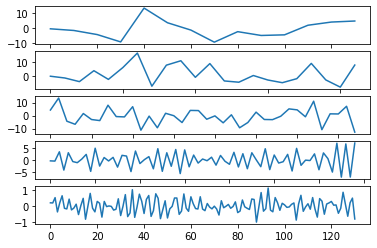

In [76]:
plt.figure()
for i in range(1, len(coeffs)):
    plt.subplot(levels, 1, i)
    plt.plot(coeffs[i])

In [84]:
from scipy.stats import median_absolute_deviation as mad

def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * mad(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

In [85]:
  filtered = wavelet_denoising(data)

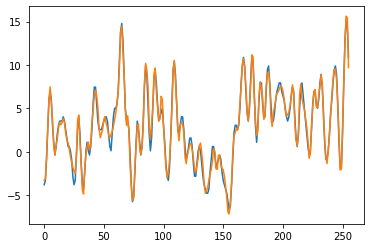

In [87]:
plt.plot(data)
plt.plot(filtered)